In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('3_clean.csv')

/var/folders/k7/skqszl5n2rgfd3d_jhqfz1w80000gn/T/ipykernel_5817/168567887.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportions_df.index,


Text(0.5, 0, 'Dataset')

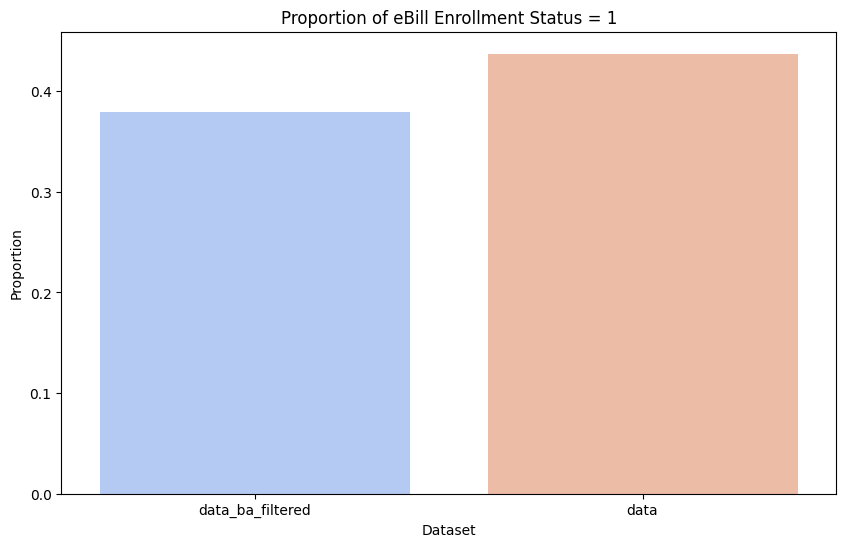

In [10]:
data_ba_filtered = data[data['reason'] == 1]

proportion_ba_filtered = (
    data_ba_filtered['ebill_enrolled_status_13_march'] == 1).mean()
proportion_data = (data['ebill_enrolled_status_13_march'] == 1).mean()

# 创建比例数据
proportions = {
    'data_ba_filtered': proportion_ba_filtered,
    'data': proportion_data
}

# 转换为DataFrame以便绘图
proportions_df = pd.DataFrame.from_dict(
    proportions, orient='index', columns=['Proportion'])

# 绘制柱状图
plt.figure(figsize=(10, 6))
sns.barplot(x=proportions_df.index,
            y=proportions_df['Proportion'], palette='coolwarm')
plt.title('Proportion of eBill Enrollment Status = 1')
plt.ylabel('Proportion')
plt.xlabel('Dataset')

eservice_ind_13_march                0       1
ebill_enrolled_status_13_march                
-1                                3041     455
 0                              485908   62544
 1                              169455  122324
 2                               15140    6452
 3                               11792   14400
 4                                1976     678
                                ebill_enrolled_status_13_march  \
ebill_enrolled_status_13_march                        1.000000   
eservice_ind_13_march                                 0.307628   

                                eservice_ind_13_march  
ebill_enrolled_status_13_march               0.307628  
eservice_ind_13_march                        1.000000  


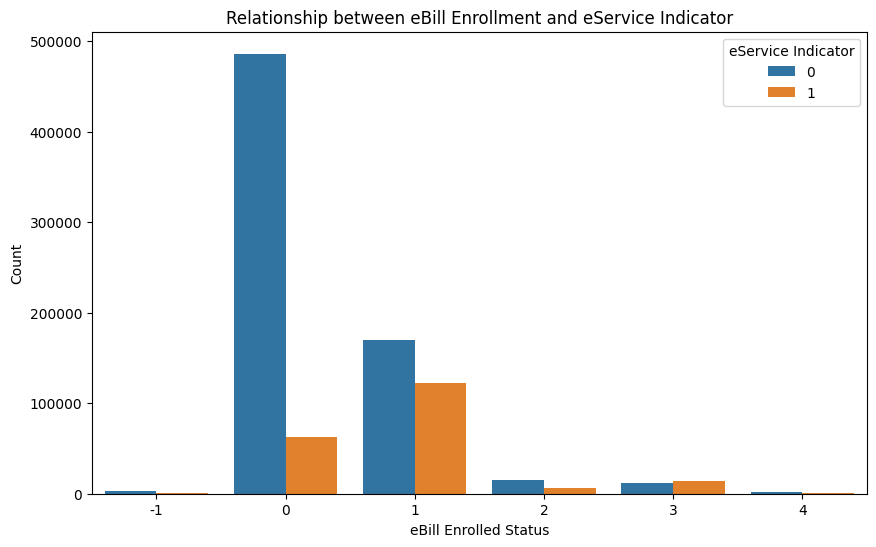

In [5]:
cross_tab = pd.crosstab(
    data['ebill_enrolled_status_13_march'], data['eservice_ind_13_march'])

# 3. 相关性分析
correlation = data[['ebill_enrolled_status_13_march',
                    'eservice_ind_13_march']].corr(method='pearson')

# 4. 可视化分析
plt.figure(figsize=(10, 6))
sns.countplot(x='ebill_enrolled_status_13_march',
              hue='eservice_ind_13_march', data=data)
plt.title('Relationship between eBill Enrollment and eService Indicator')
plt.xlabel('eBill Enrolled Status')
plt.ylabel('Count')
plt.legend(title='eService Indicator')

# 显示统计结果和图表
print(cross_tab)
print(correlation)
plt.show()